In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Ice_cream Selling data.csv')

In [4]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [5]:
df.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

C:\Users\deboj\AppData\Local\Temp\ipykernel_15484\3566917747.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


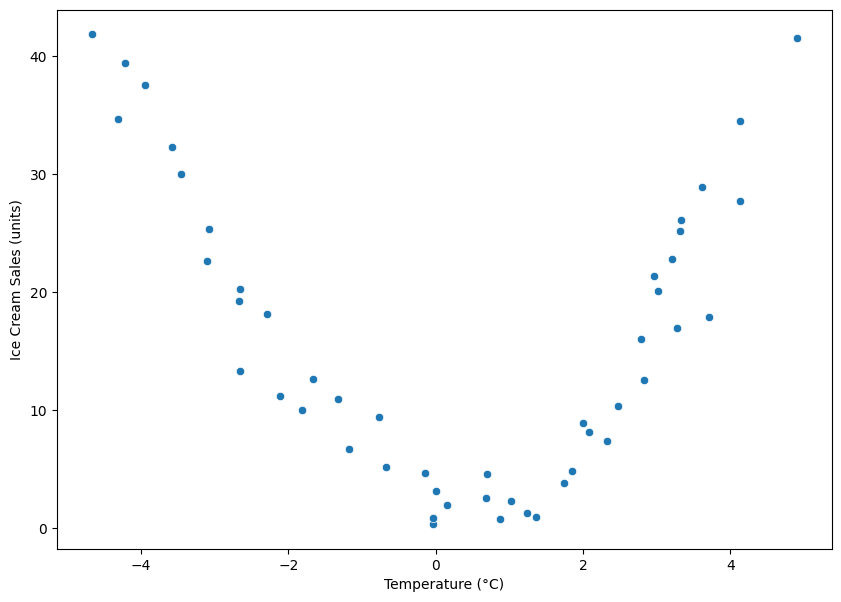

In [10]:
fig = plt.figure(figsize=(10, 7))
sns.scatterplot(x = df["Temperature (°C)"], y = df["Ice Cream Sales (units)"])
fig.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import r2_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [15]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)

SGDRegressor()

In [16]:
sgd.predict(X_test)

array([18.51323536, 10.94637441, 19.30993613,  9.30998506, 12.67170237,
       13.57074912, 18.0813852 ,  9.30605501, 10.07671818, 19.98241245])

In [17]:
r2_score(y_test, sgd.predict(X_test))

-0.6231424423604364

In [18]:
# Applying Polynomial Linear Regression
poly = PolynomialFeatures(degree = 2, include_bias = True)
# Include_bias is True by default, that a bias(intercept) column is added to the output
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
# We have to apply the same transformation to the test data and train data as well


In [20]:
X_test

array([[-2.11186969],
       [ 3.02087431],
       [-2.65228679],
       [ 4.13086796],
       [ 1.85055193],
       [ 1.24071162],
       [-1.81893761],
       [ 4.13353379],
       [ 3.61077848],
       [-3.10844012]])

In [19]:
X_test_trans

array([[ 1.        , -2.11186969,  4.45999359],
       [ 1.        ,  3.02087431,  9.12568162],
       [ 1.        , -2.65228679,  7.03462523],
       [ 1.        ,  4.13086796, 17.06407011],
       [ 1.        ,  1.85055193,  3.42454243],
       [ 1.        ,  1.24071162,  1.53936532],
       [ 1.        , -1.81893761,  3.30853403],
       [ 1.        ,  4.13353379, 17.08610158],
       [ 1.        ,  3.61077848, 13.03772121],
       [ 1.        , -3.10844012,  9.66239999]])

In [21]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test_trans)

In [24]:
r2_score(y_test, y_pred)

0.9056274133480803

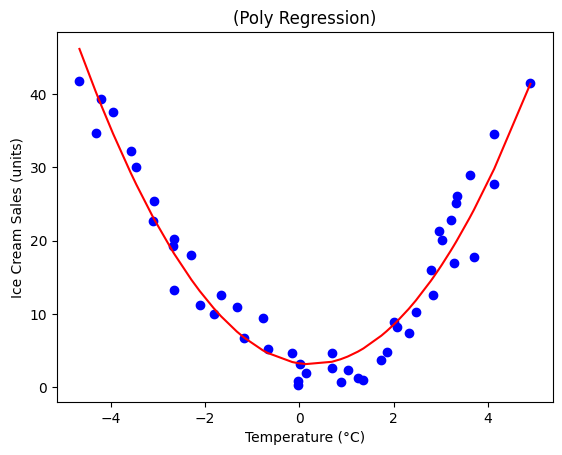

In [28]:
plt.scatter(X,y,c= "b")
plt.plot(X, lr.predict(poly.fit_transform(X)), c="r")
plt.title("(Poly Regression)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.show()

In [29]:
lr.fit(X_train, y_train)
lr.predict(X_test)
r2_score(y_test, lr.predict(X_test))

-0.6460147174536894